In [8]:
import os
import numpy as np
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(style = 'darkgrid')

# Task 1: How can we leverage mutliple data sources to produce a single flood map?

This task is designed to assess the your ability to query, pre-process, inspect, and validate a diverse range of data sources, especially remotely sensed data, to inform and validate flood models.

Given $N$ candidate input raster layers, $\textbf{X} = \{{X_1, X_2, ..., X_N}\}$, we at Cloud to Street would like to learn the parameters of some model $f(X)$ that can predict the fractional flooded area of a grid cell (pixel) $Y$.

We would like you to **complete an exploratory data analysis of some candidate input rasters**, $\textbf{X}$, in the context of this floodmapping task. Your analysis at minimum should include:
1. A quantitative summary of each candidate layer
2. A visual summary of quantiles and outliers in each data layer.
3. Discussion of the merits/drawbacks of these layers. At minimum, you should comment on:
  * Which data layers appear to have the "richest" information about flooding and why?
  * Which data layers appear to have the "least" amount of information about flooding and why?
4. Potential preprocessing steps you would apply to any of the layers prior to training a model? If so, be specific about:
  * which layer(s)
  * what transformation(s) and provide examples with code and visualizations where possible
  * What classes of models would the transformation be appropriate for (ex. Random Forests, SVMs, Logistic Regression, Convolutional Networks)
5. Additional commentory with considerations for modelling or determining what models are appropriate.

Use whichever technology and/or programming language you are most comfortable with to complete the task. You can use a copy of this Google Colab, or create your own code, noteboook, etc. Your submission should contain all the necessary instructions and files to recreate your result (jupyter notebooks, source code, execution instructions, python/R/Matlab version).

We will grade this task purely on the results of the analysis, with the requirement that the submitted code should be able to run as instructed and readable. No assessment of code style or quality will be made.


## Task 1-1 A quantitative summary of each candidate layer
In order to provide a quantitative summary of each `.tif` file, first the root path for `.tif` files in each main directory (training example) were created and appended to a python list, `list_of_images_path`. After that, each `.tif` files were read, flattened and appended to a pandas dataframe as an individual column. So the resulting pandas dataframe represents one training example and include each candidate input layer as a column of data. Finally, using `.describe()` method in pandas dataframe the descriptive statistics of each column (i.e., candidate layer) was calculated and presented.

In [10]:
dirs_list = [fname for fname in os.listdir('data/') if os.path.isdir(os.path.join('data/', fname))]
print(dirs_list)

['MOD09GA.A2001352.h10v05.006.2015146051459__512-1024', 'MOD09GA.A2008169.h11v04.006.2015175230035__512-1024', 'MOD09GA.A2011126.h10v05.006.2015218092242__512-1024', 'MYD09GA.A2005014.h11v05.006.2015098234609__0-512', 'MYD09GA.A2005256.h10v06.006.2015108002700__512-684', 'MYD09GA.A2006004.h08v05.006.2015113085023__0-512']


In [11]:
data_root='data/MOD09GA.A2001352.h10v05.006.2015146051459__512-1024'
list_of_columns = []
list_of_images_path = []
for root, dirs, files in os.walk(os.path.join(data_root, 'imagery'), topdown=True):
    # print(dirs)
    for file in files:
        if file.endswith('.tif'):
            list_of_columns.append(file.split('.')[0])
            list_of_images_path.append(os.path.join(root, file))
# print(list_of_images_path)
# print(list_of_columns)

In [12]:
df = pd.DataFrame(columns=list_of_columns)
# df

In [13]:
for index, path in enumerate(list_of_images_path):
    with rio.open(path) as src:
        x = src.read(1)
        # pprint(src.profile) # detailed raster metadata
        x = x.astype(np.float32)
        x[x==src.nodata] = 0

        df[list_of_columns[index]] = x.ravel()

In [14]:
df_describe = df.describe()
# df_describe.to_csv(f'{data_root}/results/descriptive_stats.csv', sep=',', encoding='utf-8', index=False)
df_describe

,flow_acc,flow_dir,gridmet_pr,gridmet_pr_3days,gridmet_pr_5days,gridmet_pr_7days,GSW,hand,rt_72h_max,rt_72h_mean,sm_t0,sm_tm24_tm0,sm_tm48_tm24,sm_tm72_tm48,streamflow
count,2.841600e+05,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000,284160.000000
mean,1.489512e+04,26.965271,0.667427,435.740021,546.290344,1037.787109,2.983008,14.974836,7.469668,2.964767,39.599796,39.945976,39.313156,38.514633,79.440056
std,1.886761e+05,17.864946,6.370377,342.661896,423.278809,497.582367,14.134555,18.031885,13.792254,6.882548,10.007306,10.025323,10.108237,10.218264,730.667542
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,14.000000,14.000000,14.000000,0.000000
25%,3.024518e+00,12.488005,0.000000,179.000000,208.000000,708.000000,0.000000,3.851591,1.000000,0.040000,35.000000,35.000000,35.000000,34.000000,0.056843
50%,8.370121e+00,23.361378,0.000000,304.000000,382.000000,1015.000000,0.003684,9.661176,3.000000,0.760000,38.000000,38.000000,38.000000,37.000000,0.375494
75%,4.692364e+01,38.573740,0.000000,672.000000,849.000000,1430.000000,0.119781,19.644253,8.000000,2.440000,42.000000,42.000000,41.000000,40.000000,2.354234
max,4.811762e+06,118.175011,146.000000,2007.000000,2390.000000,2753.000000,100.000000,391.457092,422.000000,372.920013,100.000000,100.000000,100.000000,100.000000,18959.378906


### Coefficient of variation
"The coefficient of variation, also known as relative standard deviation, is a standardized measure of dispersion of a probability distribution or frequency distribution" [Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_variation). Numerically speaking this analysis shows `flow_acc`, `gridmet_pr`, `GSW`, `rt_72h_mean` and `streamflow` have more dispersion, which can be assumed that they provide more information.

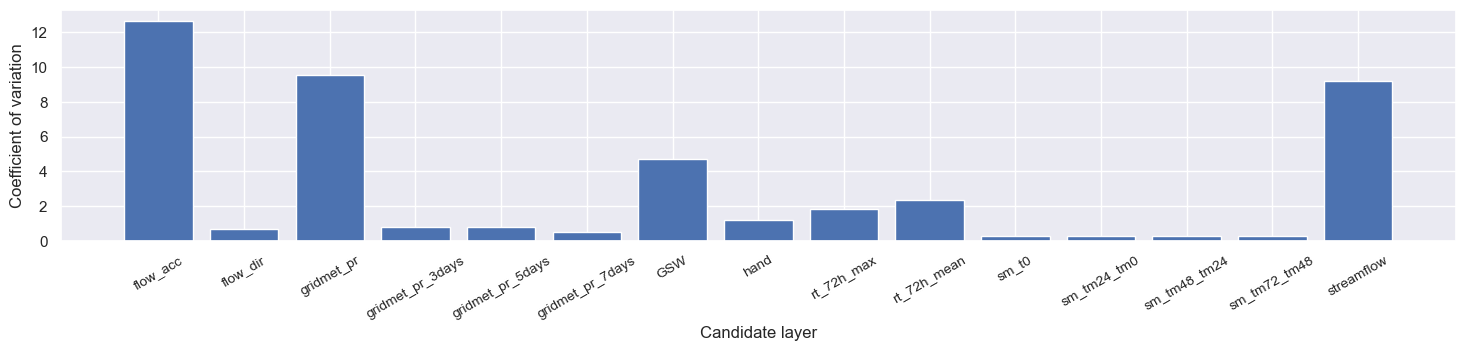

In [47]:
cv_df = df.std() / df.mean()
cv_df = cv_df.reset_index().rename(columns={'index':'layer_name', 0:'cv'})
fig, ax = plt.subplots(figsize=(18,3))

ax.bar(cv_df['layer_name'], cv_df['cv'])
ax.tick_params(axis='x', labelrotation=30, labelsize=10)
ax.set_xlabel('Candidate layer')
ax.set_ylabel('Coefficient of variation')

plt.savefig(f'{data_root}/results/cv.png')
plt.show()


## Task 1-2 A visual summary of quantiles and outliers in each data layer.
One simple and useful method for visually illustrating the quantiles and outliers of each data is boxplot. Here, both boxplot and histrogram were used to show both the quantiles and outliers as well as data distribution for each candidate layer. kurtosis, `kt` and skewness, `sk` of each layer were shown on top of the corresponding histogram. "Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case" [itl.nist.gov](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.).

A normal distribution will have a skewness of 0. Expect one layer, `gridmet_pr_7days` which has skewness close to 0, the rest of the candidates have positive skewness indicating that the size of the right-handed tail is larger than the left-handed tail. It implies most of the data is accumulated in lower values of the total range.

The candidate layers have different situation wrt. the kurtosis. If the kurtosis of the candidate layer is compared with that of normal distribution, which is equal to 3, some candidate layers including `flow_acc`, `gridmet_pr`, `GSW`, `hand`, `rt_72h_max`, `rt_72h_mean`, all soil moisture layers and ` streamflow` have kurtosis greater than 3, indicating heavier tails than a normal distribution (which implies the likelihood of out layers presence). While four other layers including `flow_dir`, `gridmet_pr_3days`, `gridmet_pr_5days`, and `gridmet_pr_7days` have the kurtosis less than 3, implying lighter tails than a normal distribution (less in the tails and fewer out layers).


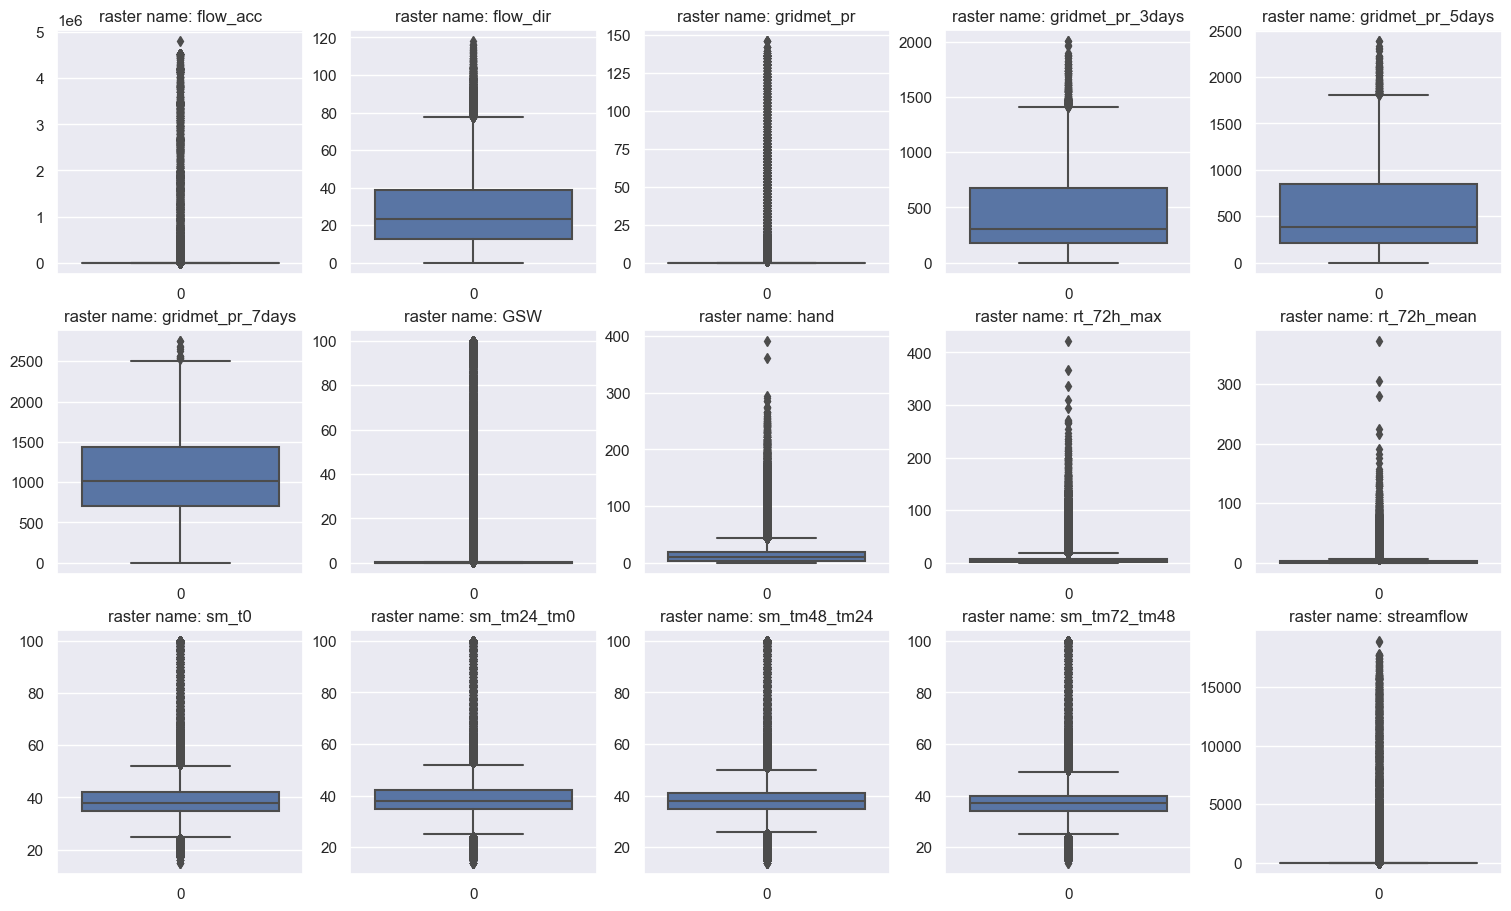

In [114]:
fig, axes = plt.subplots(nrows=3, ncols=5 , figsize=(15, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(df.iteritems()):

    i, j = divmod(index, 5)

    sns.boxplot(data=column_data, orient='v', ax=axes[i, j])
    axes[i, j].set_title(f'raster name: {column_name}')
    axes[i, j].set_xlabel('')

plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

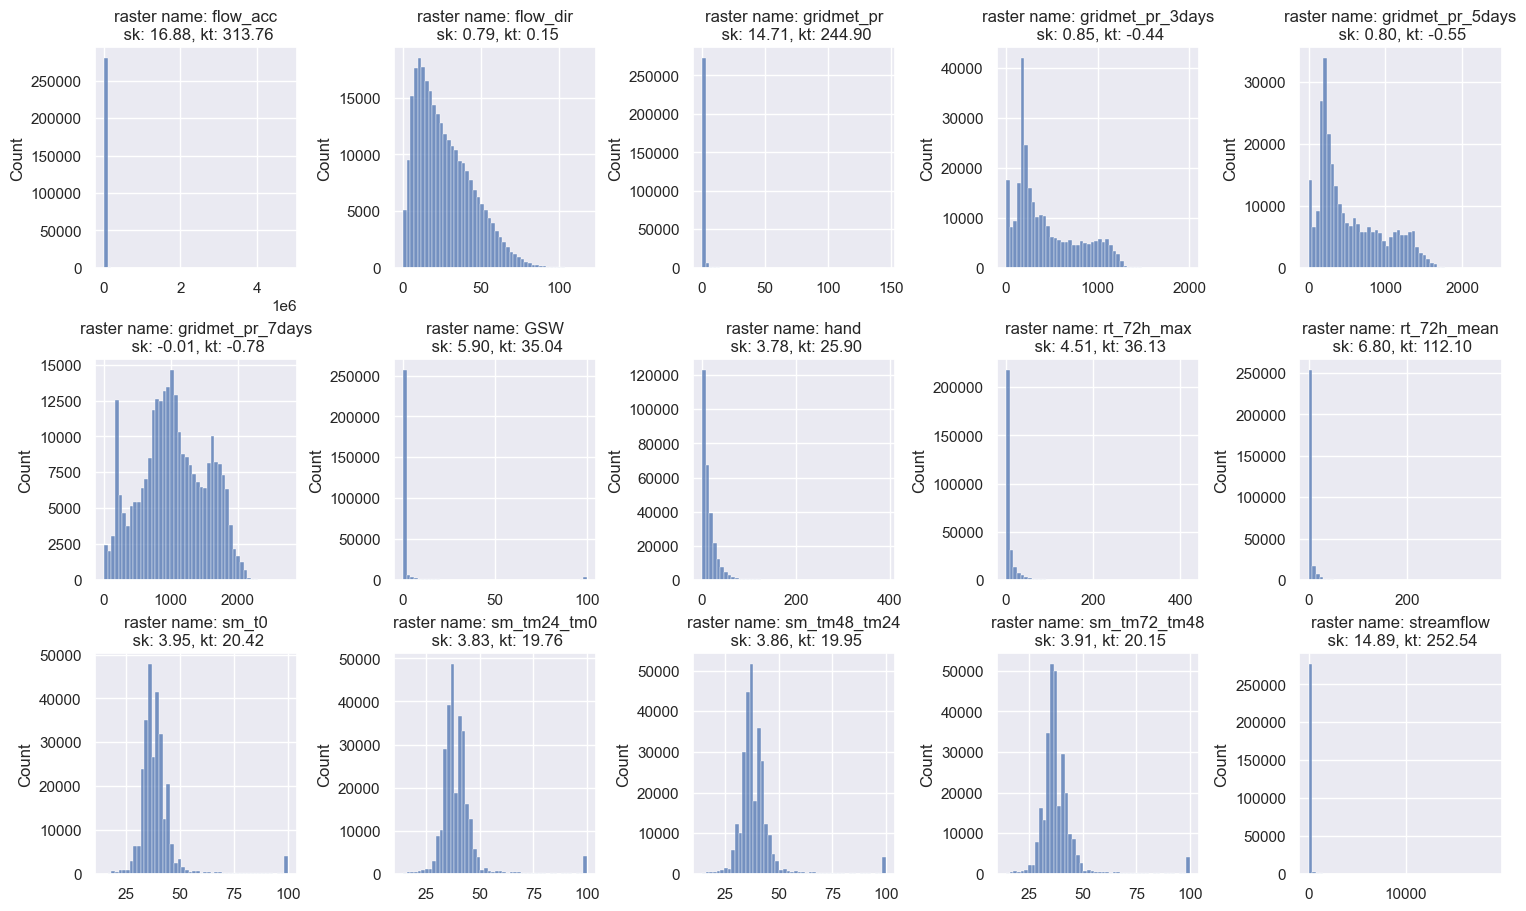

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=5 , figsize=(15, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(df.iteritems()):
    i, j = divmod(index, 5)

    sns.histplot(x=column_data.values, bins=50, ax=axes[i, j])
    axes[i, j].set_title(f'raster name: {column_name}\n sk: {skew(column_data.values):.2f}, kt: {kurtosis(column_data.values):.2f}')
    axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/histrograms.png')
plt.show()


## Task 1-3 Discussion of the merits/drawbacks of these layers.

### 1-3-1 Which data layers appear to have the "richest" information about flooding and why?
Candidate layers are as follows:

#### HAND
HAND stands for the Height Above Nearest Drainage, and it, alone!, can be considered as a conceptual method for flood inundation mapping. `HAND` can be estimated for each catchment by using a digital elevation model (DEM) of the terrain and a spatial representation of a river network (commonly come from National Hydrography Datasets-- NHD). So, by having water stage, HAND can estimate inundation zone and a water depth grid. Water stage can be derived from synthetic rating-curves (to provide different scenarios) or the outcome of **Channel Routing** module of NWM. In NWM, depending on what algorithm is being used-- gridded or linked routing-- physical model (1D Diffusive Wave approximation) or conceptual models (Muskingum or Muskingum-Cunge) can be adopted for performing channel routing. So, `HAND` raster includes rich information for flood as it derived from DEM and river network.

##### References
- Zheng, Xing, et al. "River channel geometry and rating curve estimation using height above the nearest drainage." JAWRA Journal of the American Water Resources Association 54.4 (2018): 785-806.
- Johnson, J. Michael, et al. "An integrated evaluation of the national water model (NWM)–Height above nearest drainage (HAND) flood mapping methodology." Natural Hazards and Earth System Sciences 19.11 (2019): 2405-2420.
- Gochis, D.J., et al. "The WRF-Hydro® modeling system technical description." (2020): Version 5.1.1

#### NWM Routing Previous 72h Mean
For surface overland flow routing, NWM uses a physical model, i.e., 2D diffusive wave approximation formulated by Ogden 1997. It's a good layer to be considered as it includes information of the ponded water depth (surface head) of the grid cells.

##### References
- Gochis, D.J., et al. "The WRF-Hydro® modeling system technical description." (2020): Version 5.1.1

#### NWM Soil Moisture tm72-tm48
Water will pond on the surface only if the rainfall intensity is greater than the infiltration capacity of the soil, the process of water penetrating from the ground surface into the soil. Many factors influence infiltration rate, e.g., condition of the soil surface, and it's vegetation cover, soil properties like porosity and hydraulic conductivity, and finally moisture content of the soil. Moreover, Figure 1 shows how the soil moisture content can affect other factors too.

<p align = "center">
    <img src="https://github.com/smhassanerfani/c2s/blob/main/data/sm_vs_k.png?raw=true"
    alt="" width="100%">
</p>
<p align = "center">
    Figure 1. The effect of soil moisture content on hydraulic conductivity.
</p>

##### References
- Chow, Ven Te, David R. Maidment, and W. Larry. "Mays. Applied Hydrology." International edition, MacGraw-Hill, Inc 149 (1988).

#### Global Surface Water, Flow Direction, and Flow Accumulation
These three layers, can be useful for embedding the effect of sea level rise and coastal flooding impacts.

### 1-3-2 Which data layers appear to have the "least" amount of information about flooding and why?

#### Precip 1 day sum, Precip 3 day sum, Precip 5 day sum, and Precip 7 day sum
This task does not represent a rainfall-runoff model, and models are not trained to learn rainfall-runoff process. Moreover, the effect of precipitations are physically calculated in NWM Land Surface Module (Noah-MP) and the output results is considered in `NWM Routing Previous 72h Mean` and `NWM Soil Moisture tm72-tm48` layers.

#### NWM Streamflow Linear Interpolation
According to the definition mentioned for this layer, it can be considered a rough representation for riverine flooding. This layer simply implies, the closer grid cell to the stream are more susceptible to flood which conceptually makes sense. But as the other candidate layers (i.e., `NWM Routing Previous 72h Mean`, `hand`) can better represent this layer, and adding further layers, implying on the same phenomenon, might cause bias on the final result, I wouldn't consider this layer.

#### NWM Routing Previous 72h Max
In NWM, the ponded water of the grid cells inflows to the channel whenever it exceeds the retention depth (i.e., the combination of the local infiltration excess, the amount of water flowing onto the grid cell from overland flow, and exfiltration from groundwater flow), so considering maximum values of ponded water for 72 hours might be an overestimation.

##### References
- Gochis, D.J., et al. "The WRF-Hydro® modeling system technical description." (2020): Version 5.1.1

#### NWM Soil Moisture t0, NWM Soil Moisture tm24-tm0, NWM Soil Moisture tm48-tm24
`NWM Soil Moisture tm72-tm48` is better representative compared to other soil Moisture layers.


## Task 1-4 Potential preprocessing steps you would apply to any of the layers prior to training a model?
  * which layer(s)
  * what transformation(s) and provide examples with code and visualizations where possible
  * What classes of models would the transformation be appropriate for (ex. Random Forests, SVMs, Logistic Regression, Convolutional Networks)

For all layers, Min-Max scaler is applied to transfer the values to the range of [0 1]. Then, Depending on model, further preprocessing can be applied. In the case of ConNets, for example, having pre-trained feature extraction backbone on specific dataset (e.g., pre-trained ResNet on ImageNet), Standard scaler (Z-score) will be applied based on the Mean and STD of the pretrained dataset (ImageNet in this example). This scaler transforms the new dataset into the same data space that the backbone model were trained based upon. In the case of tree-based models (Random Forests, XGBoost, etc.), they don't require scaling as they are invariant to transformations of any input variable. For SVMs, as predictors and target variable has highly skewed distribution, using log transformation 'might' enhance the performance of the models, it should be tested, though.


In [6]:
dirs_list = [fname for fname in os.listdir('data/') if os.path.isdir(os.path.join('data/', fname))]
targets_path = []
for dir in dirs_list:
    targets_path.append(f'data/{dir}/label/floodmap_v0_11_with_cloudmask.tif')

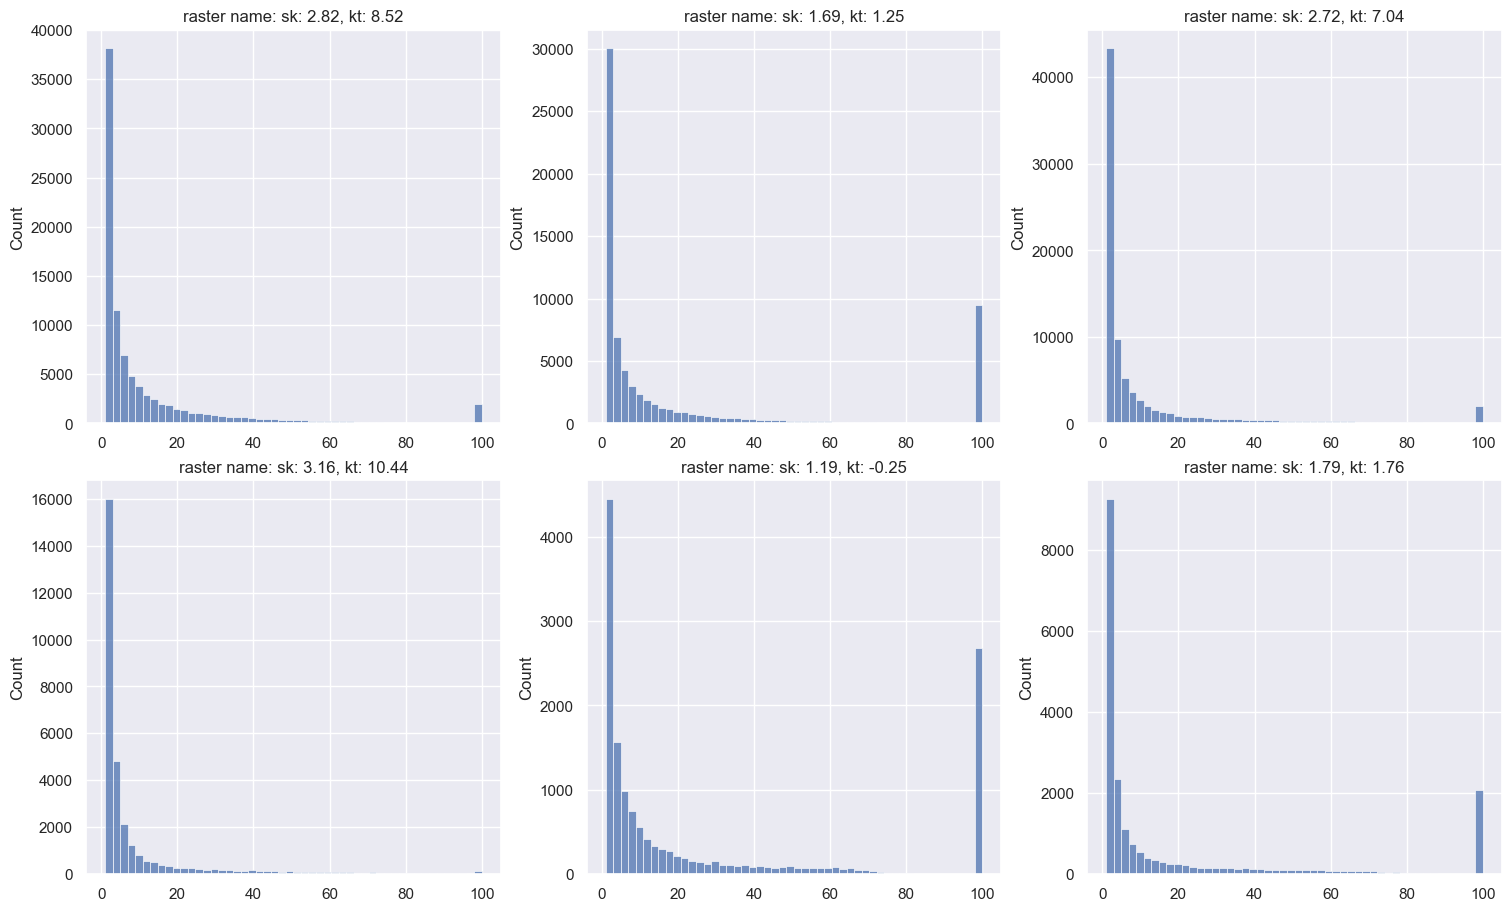

In [16]:
plt.show()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9), constrained_layout=True)

for index, tpath in enumerate(targets_path):
    i, j = divmod(index, 3)
    with rio.open(tpath) as src:
        x = src.read(1)
        # pprint(src.profile) # detailed raster metadata
        x = x.astype(np.float32)
        x[x==src.nodata] = 0
        x = x.ravel()
    x = x[x!=0]
    sns.histplot(x=x, bins=50, ax=axes[i, j])
    axes[i, j].set_title(
        f'raster name: sk: {skew(x):.2f}, kt: {kurtosis(x):.2f}')
    axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/histrograms.png')
plt.show()

## Task 1-5  additional commentary with considerations for modelling or determining what models are appropriate.